# 3. Analysis
## 3.5. Q5: Frequency of Terms Related to the Ukrainian Side in News Coverage Since the Start of the SMO

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
%run "0.1. Intro_Visualization style.ipynb"

In [19]:
%run "3.0. Analysis_Functions.ipynb"

## Data loading

In [20]:
file = 'data/df_tokenized.csv'

In [21]:
df_tokenized = pd.read_csv(file)
df_tokenized.drop(columns=['Unnamed: 0'], inplace=True)
df_tokenized['dat'] = pd.to_datetime(df_tokenized['dat'])

## Preparing data

In [22]:
# Make all columns lower case
for col in ['tags_top', 'title', 'body', 'tags_bottom', 'body_token_final', 'title_token_final']:
    df_tokenized[col] = df_tokenized[col].str.lower()

In [23]:
df_tokenized.head(3)

,id_in_source_file,date,tags_top,title,url,body,tags_bottom,video_duration_seconds,file_key,datetime,dat,year,year_month,hour,weekday,whole newscast,body_token_final,title_token_final
0,15,2023-01-27 21:45:00,общество,выпуск программы «время» в 21:00 от 27.01.2023,https://www.1tv.ru/news/2023-01-27/446104-vypu...,смотрите в этом выпуске: 79 лет назад была пол...,общество,2422.0,0-15,2023-01-27 21:45:00,2023-01-27,2023,2023-01,21,4,True,"['смотреть', 'выпуск', '79', 'год', 'полностью...","['выпуск', 'программа', 'время', '21:00', '27...."
1,16,2023-01-27 21:35:00,культура,в москве проходит церемония вручения премии «з...,https://www.1tv.ru/news/2023-01-27/446121-v_mo...,событие в мире отечественного кино. в москве в...,"культура,кино,марина зудина,екатерина климова,...",290.0,0-15,2023-01-27 21:35:00,2023-01-27,2023,2023-01,21,4,False,"['событие', 'мир', 'отечественный', 'кино', 'м...","['москва', 'проходить', 'церемония', 'вручение..."
2,20,2023-01-27 21:34:00,спорт,в туле появился новый футбольный манеж,https://www.1tv.ru/news/2023-01-27/446120-v_tu...,футбольный манеж в туле — искусственный газон ...,"спорт,регионы,футбол,алексей дюмин,тульская об...",48.0,0-15,2023-01-27 21:34:00,2023-01-27,2023,2023-01,21,4,False,"['футбольный', 'манеж', 'тула', 'искусственный...","['тула', 'появиться', 'новый', 'футбольный', '..."


In [24]:
# Filter rows that are needed for analysis

# Mark rows about the special military operation
df_tokenized['SMO'] = df_tokenized['tags_bottom'].str.contains('специальная военная операция|вооруженные силы')
#Filter
df_SMO = df_tokenized[(df_tokenized['SMO']==1)&(df_tokenized['dat']>=pd.to_datetime('2022-02-24'))]

## Estimating frequency of terms related to the Ukrainian side

In [25]:
# Terms related to the Ukrainian side
names_dic = {
    'Nationalist': ['националист', 'нацбатальон', 'нацформирован'],
    'Bandera': ['бандеров'],
    'Mercenary': ['наемник', 'наёмник'],
    'Nazi': ['нацист', 'нацизм'],
    'Chastener': ['карател'],
    'Fascist': ['фашист', 'фашизм'],
    'Radical': ['радикал'],
    'Saboteur': ['диверсант'],
    'Militant': ['боевик'],
    'Enforcer': ['силовик'],
    'Enemy': ['враг', 'враж'],
    'Adversary': ['противник'],
    'Armed forces of Ukraine': ['всу', 'вооруженные силы украины', 'вооружённые силы украины',
                                'воруженных сил украины', 'воружённых сил украины',
                                'воруженным силам украины', 'воружённым силам украины',
                                'войска украины', 'войск украины', 'войскам украины',
                                'украинские войска', 'украинских войск', 'украинским войскам',
                                'украинский батальон', 'украинского батальона', 'украинскому батальону'],
    'Ukrainian servicemen': ['украинские военнослужащие', 'украинским военнослужащим', 'украинских военнослужащих',
                             'украинский военнослужащий', 'украинского военнослужащего', 'украинскому военнослужащему',
                             'украинские солдаты', 'украинским солдатам', 'украинских солдатов',
                             'украинский солдат', 'украинского солдата', 'украинскому солдату',
                             'украинские бойцы', 'украинским бойцам', 'украинских бойцов',
                             'украинский боец', 'украинского бойца', 'украинскому бойцу'],
    'Armed formations of Ukraine': ['вфу', 'формирования украины', 
                                    'формирований украины', 
                                    'формированиям украины', 
                                    'украинские формирования', 'украинских формирований',
                                    'украинским формированиям'],
    'Criminal': ['преступ', 'криминал', 'убийц', 'убийств']
    }

In [26]:
# Estimate how often different names for Ukrainian adversaries are used
names_dic_count = {}
for name_key, name_values in names_dic.items():
    
    count_name = 0
    for name_value in name_values:
        # We count all terms that were used - in news title and news body
        count_name += len(df_SMO['body'].str.extractall("("+name_value+")")) \
                     +len(df_SMO['title'].str.extractall("("+name_value+")")) 
        
    names_dic_count[name_key] = count_name

In [27]:
names_count_df = pd.DataFrame.from_dict(names_dic_count, orient='index', columns=['frequency'])
names_count_df.sort_values(by='frequency', inplace=True)
names_count_df

,frequency
Bandera,42
Chastener,70
Fascist,113
Armed formations of Ukraine,210
Saboteur,406
Ukrainian servicemen,650
Enforcer,684
Mercenary,883
Criminal,886
Enemy,913


## Visualizations

In [28]:
# Terms with neutral connotation
neutral_names = ['Armed forces of Ukraine', 'Armed formations of Ukraine', 'Adversary', 
                 'Enforcer', 'Enemy', 'Ukrainian servicemen']

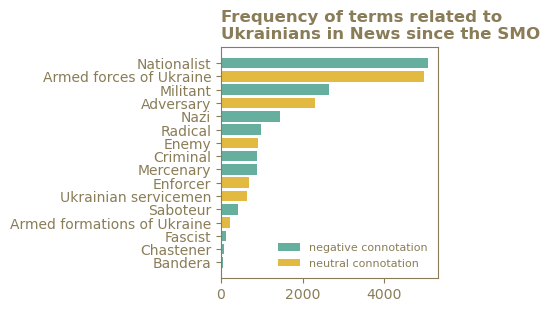

In [29]:
# Bar chart
plt.figure(figsize=(2.8, 3))
plt.barh(names_count_df.index, 
         names_count_df['frequency'],
         color=color_4,
         label='negative connotation')
plt.barh(names_count_df[names_count_df.index.isin(neutral_names)].index, 
         names_count_df.loc[names_count_df.index.isin(neutral_names), 'frequency'],
         color=color_2,
         label='neutral connotation')
plt.legend(loc = 'lower right', frameon=False, fontsize=8)
plt.title('Frequency of terms related to\nUkrainians in News since the SMO', loc='left');

In [30]:
names_count_df['connotation'] = np.where(names_count_df.index.isin(neutral_names), 
                                         'neutral',
                                         'negative')
names_count_df

,frequency,connotation
Bandera,42,negative
Chastener,70,negative
Fascist,113,negative
Armed formations of Ukraine,210,neutral
Saboteur,406,negative
Ukrainian servicemen,650,neutral
Enforcer,684,neutral
Mercenary,883,negative
Criminal,886,negative
Enemy,913,neutral


In [31]:
connotation = names_count_df.groupby('connotation')[['frequency']].sum()
connotation

,frequency
connotation,
negative,12543
neutral,9758


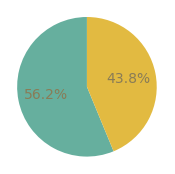

In [32]:
# Create pie chart
fig1, ax1 = plt.subplots(figsize=(2, 2))
ax1.pie(connotation['frequency'],  
        autopct='%1.1f%%',
        colors = [color_4, color_2],
        startangle=90)
ax1.axis('equal'); 